<a href="https://colab.research.google.com/github/dsvallespir/dsp-python/blob/main/session1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NameError: name 'true' is not defined

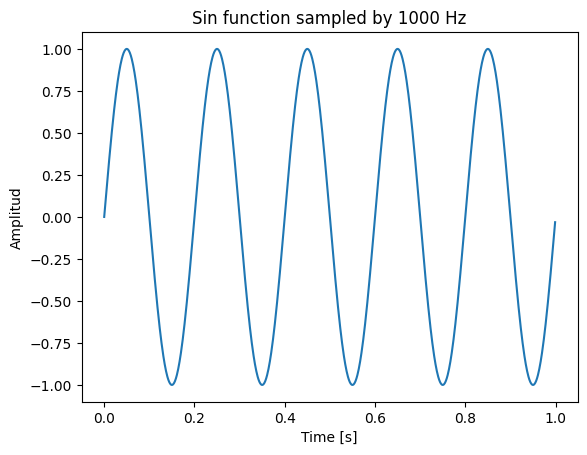

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# params

fs = 1000
T = 1.0
f0 = 5

t = np.arange(0, T, 1/fs)   # time vector
x = np.sin(2 * np.pi * f0 * t)

plt.figure()
plt.plot(t, x)
plt.xlabel("Time [s]")
plt.ylabel("Amplitud")
plt.title("5 Hz sine wave sampled at 1000 Hz")
plt.grid(True)
plt.show()